In [45]:
%matplotlib inline
import pyspeckit
import numpy as np
from astropy import units as u
from astropy.io import fits

## Basic Plotting and Fitting

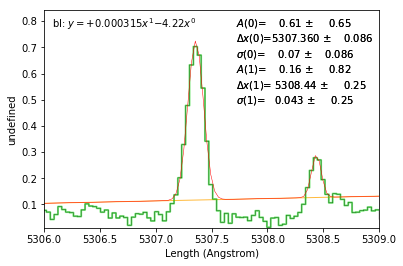

In [146]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
s_data = s_hdu[1].data
s_flux = abs(s_data['FLUX'] - 1.)
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(xmin=5306, xmax=5309)
sp.baseline(subtract=False, highlight_fitregion=True, excludefit = True, exclusionlevel = 0.1)

sp.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1, 0.3, 5308.4, 0.1])
sp.plotter.savefig('basic_plot_example_withfit.png')

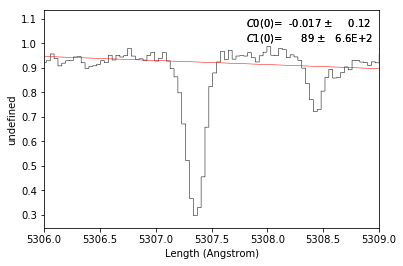

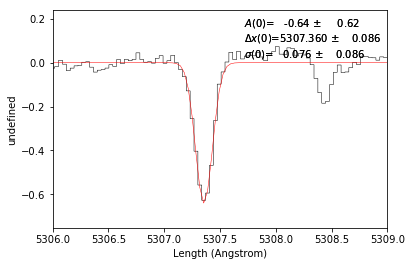

In [144]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
s_data = s_hdu[1].data
s_flux = s_data['FLUX']
s_wav = s_data['WAVEL'] * u.AA

sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(xmin=5306, xmax=5309)

sp.specfit.Registry.add_fitter('polycontinuum',
                               pyspeckit.models.polynomial_continuum.poly_fitter(),
                               2)

sp.specfit(fittype='polycontinuum', guesses=(0.9,12), exclude = [5307.1,5307.5])

sp_contsub = sp.copy()
sp_contsub.data -= sp.specfit.get_full_model()
sp_contsub.plotter()

sp_contsub.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1])

#sp.baseline(subtract=True, highlight_fitregion=True)

#sp.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1])
#sp.plotter.savefig('basic_plot_example_withfit.png')